## Correlation: &thinsp; DOC and area of ascent

A_a - Area of ascent (wap500 < 0)

In [19]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy

from os.path import expanduser
home = expanduser("~")

import warnings
from shapely.errors import ShapelyDeprecationWarning
warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning)

In [20]:
from plotFuncs import *

In [21]:
plt.rcParams['figure.figsize'] = [10, 7.5]

### one dataset

In [22]:
variable = 'wap'

org_options = [
    'rome',
    # 'o_number'
    ]

models = [
    # 'IPSL-CM5A-MR', # 1
    'GFDL-CM3',     # 2
    # 'GISS-E2-H',    # 3
    # 'bcc-csm1-1',   # 4
    # 'CNRM-CM5',     # 5
    # 'CCSM4',        # 6
    # 'HadGEM2-AO',   # 7
    # 'BNU-ESM',      # 8
    # 'EC-EARTH',     # 9
    # 'FGOALS-g2',    # 10
    # 'MPI-ESM-MR',   # 11
    # 'CMCC-CM',      # 12
    # 'inmcm4',       # 13
    # 'NorESM1-M',    # 14
    # 'CanESM2',      # 15
    # 'MIROC5',       # 16
    # 'HadGEM2-CC',   # 17
    # 'MRI-CGCM3',    # 18
    # 'CESM1-BGC'     # 19
    ]

observations = [
    ]

datasets = models + observations

resolutions = [
    # 'original',
    'regridded'
    ]

experiments =[
    'historical',
    # 'rcp85'
    ]


print('variable:{}, dataset:{}, experiment:{}, resolution:{}'.format(variable, datasets[0], experiments[0], resolutions[0]))
ds = get_dsvariable(variable, datasets[0], experiments[0], resolution=resolutions[0])
ds

variable:wap, dataset:GFDL-CM3, experiment:historical, resolution:regridded


<xarray.Dataset>
Dimensions:  (plev: 8, time: 10950, lat: 22, lon: 128)
Coordinates:
  * plev     (plev) float64 1e+05 8.5e+04 7e+04 5e+04 2.5e+04 1e+04 5e+03 1e+03
  * time     (time) object 1970-01-01 12:00:00 ... 1999-12-31 12:00:00
  * lat      (lat) float64 -29.3 -26.51 -23.72 -20.93 ... 20.93 23.72 26.51 29.3
  * lon      (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
Data variables:
    wap      (time, plev, lat, lon) float32 ...

In [23]:
data = ds['wap'].sel(plev = 5e4)
data = data.where(data<0)
data

<xarray.DataArray 'wap' (time: 10950, lat: 22, lon: 128)>
array([[[         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        ...,
        [         nan, -47.96988   , -84.31701   , ...,          nan,
                  nan,          nan],
        [         nan,          nan, -40.889652  , ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan]],

       [[         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,  -0.43000674,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
...
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
         -13.689754  ,  -2.7167816 ]],

       [[         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        ...,
        [ -1.6782535 ,          nan,          nan, ..., -28.124565  ,
         -20.88161   , -11.926265  ],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [ -1.8709072 , -16.803032  , -20.042156  , ...,          nan,
                  nan,          nan]]], dtype=float32)
Coordinates:
    plev     float64 5e+04
  * time     (time) object 1970-01-01 12:00:00 ... 1999-12-31 12:00:00
  * lat      (lat) float64 -29.3 -26.51 -23.72 -20.93 ... 20.93 23.72 26.51 29.3
  * lon      (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
Attributes:
    regrid_method:  conservative
    units:          hPa day⁻¹

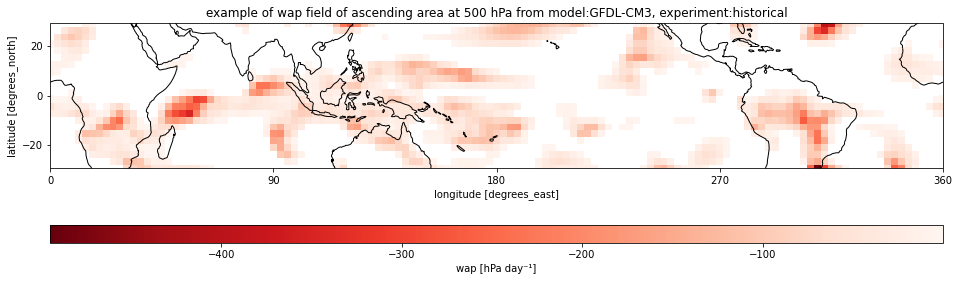

In [24]:
scene = data.isel(time=0)
title = 'example of {} field of ascending area at 500 hPa from model:{}, experiment:{}'.format(variable, datasets[0], experiments[0])
cmap = 'Reds_r'
plot_scene(scene, cmap=cmap, title = title)

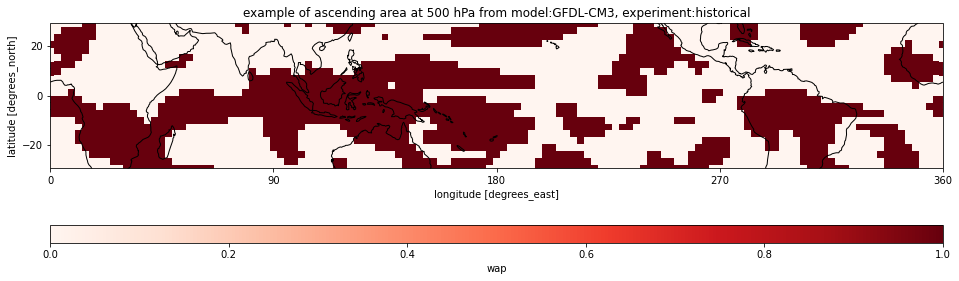

In [18]:
scene = data.isel(time=0)<0
title = 'example of ascending area at 500 hPa from model:{}, experiment:{}'.format(datasets[0], experiments[0])
cmap = 'Reds'
plot_scene(scene, cmap=cmap, title = title)

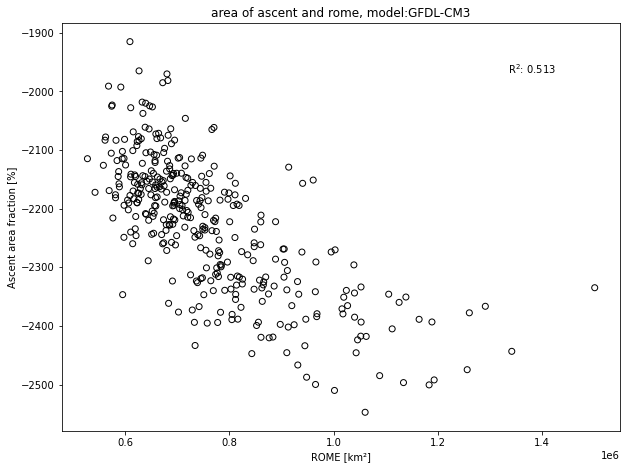

In [8]:
aWeights = np.cos(np.deg2rad(data.lat))

x = get_metric(org_options[0], datasets[0], experiments[0], resolution=resolutions[0])['rome'].resample(time='M').mean(dim='time')
y = data.sum(dim=('lat','lon')).resample(time='M').mean(dim='time')*(100/(22*128))


fig = plt.figure()
ax= fig.add_subplot()
plot_scatter(x, y, ax)
plt.title('area of ascent and rome, model:{}'.format(datasets[0]))
plt.xlabel('ROME [{}]'.format('km\u00b2'))
plt.ylabel('Ascent area fraction [{}]'.format('%'))
plt.show()

### comparing datasets

In [9]:
variable = 'wap'

org_options = [
    'rome',
    # 'o_number'
    ]

models = [
    'IPSL-CM5A-MR', # 1
    'GFDL-CM3',     # 2
    # 'GISS-E2-H',    # 3 no wap data
    'bcc-csm1-1',   # 4 no wap rcp
    'CNRM-CM5',     # 5
    # 'CCSM4',        # 6 no wap data
    # 'HadGEM2-AO',   # 7 no wap data
    'BNU-ESM',      # 8
    # 'EC-EARTH',     # 9 no wap data
    'FGOALS-g2',    # 10
    'MPI-ESM-MR',   # 11
    'CMCC-CM',      # 12 no wap data
    'inmcm4',       # 13
    'NorESM1-M',    # 14
    'CanESM2',      # 15
    'MIROC5',       # 16
    # 'HadGEM2-CC',   # 17 no wap data
    'MRI-CGCM3',    # 18
    # 'CESM1-BGC'     # 19 no wap data
    ]

observations = [
    ]

datasets = models + observations

resolutions = [
    # 'original',
    'regridded'
    ]

experiments = [
    'historical',
    # 'rcp85'
    ]

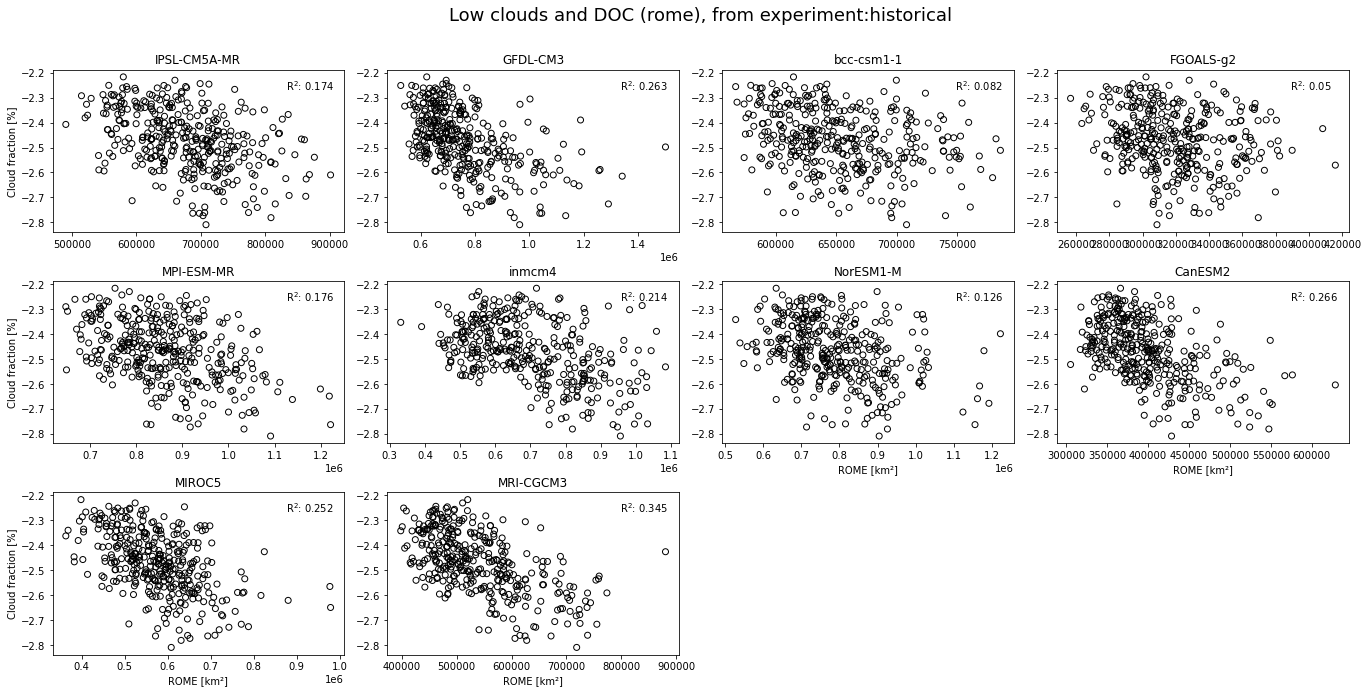

In [11]:
quantile_low = 0
quantile_high = 1

absolute_xlimits = False
if absolute_xlimits:
    xmin, xmax = [], []
    for dataset in datasets:

        org = get_metric(org_options[0], dataset, experiments[0], resolution=resolutions[0])['rome']
        x = org.resample(time='M').mean(dim='time', keep_attrs=True)

        xmin = np.append(xmin, np.quantile(x, quantile_low))
        xmax = np.append(xmax, np.quantile(x, quantile_high))

    xmin = np.min(xmin)
    xmax = np.max(xmax)
else:
    xmin, xmax = None, None 


absolute_ylimits = False
if absolute_ylimits:
    ymin, ymax = [], []
    for dataset in datasets:

        data = get_dsvariable(variable, datasets[0], experiments[0], resolution=resolutions[0])['wap']
        data = data.sel(plev = 5e4)
        data = data.where(data<0)
        y = data.sum(dim=('lat','lon')).resample(time='M').mean(dim='time')*(100/(22*128))

        ymin = np.append(ymin, np.quantile(y, quantile_low))
        ymax = np.append(ymax, np.quantile(y, quantile_high))

    ymin = np.min(ymin)
    ymax = np.max(ymax)

else:
    ymin, ymax = None, None 


fig= plt.figure(figsize=(22.5,17.5))
title = 'Low clouds and DOC ({}), from experiment:{}'.format(org_options[0], experiments[0])

fig.suptitle(title, fontsize=18, y=0.95)

for i, dataset in enumerate(datasets):
    ax= fig.add_subplot(5,4,i+1)
    title = dataset

    org = get_metric(org_options[0], dataset, experiments[0], resolution=resolutions[0])['rome']
    x = org.resample(time='M').mean(dim='time', keep_attrs=True)

    data = get_dsvariable(variable, datasets[0], experiments[0], resolution=resolutions[0])['wap']
    data = data.sel(plev = 5e4)
    data = data.where(data<0)
    y = data.sum(dim=('lat','lon')).resample(time='M').mean(dim='time')*(100/(22*128))

    plot_scatter(x, y , ax)
    plt.title(dataset)
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)

    if (len(datasets)-i)<=4:
        xlabel = 'ROME [{}]'.format('km\u00b2')
        plt.xlabel(xlabel)

    if i== 0 or i==4 or i==8 or i==12 or i==16:
        ylabel = 'Cloud fraction [{}]'.format('%')
        plt.ylabel(ylabel)

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.15, hspace=0.3)